#  <center> <font color='darkcyan'>  Diferentes Técnicas de Aprendizaje Estadístico </font> </center>

###   <center> <font color='darkcyan'> Jessica Quintero López </font> </center>

###  <font color='darkcyan'>  Importamos los paquetes necesarios: </font> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn import svm
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

#  <center> <font color='darkcyan'> Regresión Lineal </font> </center>

In [10]:
base1 = pd.read_csv('USA_Housing.csv')
base1.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [11]:
base1.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [3]:
print("Tipo de Variables \n")
print(base1.dtypes)
print("Cantidad de datos faltantes \n")
print(base1.isnull().sum())
print("Estadisticos de resumen \n")
print(base1.describe(include="all"))

Tipo de Variables 

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object
Cantidad de datos faltantes 

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64
Estadisticos de resumen 

        Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count        5000.000000          5000.000000                5000.000000   
unique               NaN                  NaN                        NaN   
top                  NaN                  NaN                        NaN   
freq                 NaN                  NaN                        NaN   

In [12]:
x = base1.drop('Address', axis=1)
y = base1['Price']
x2 = x.drop('Avg. Area Number of Bedrooms', axis=1)

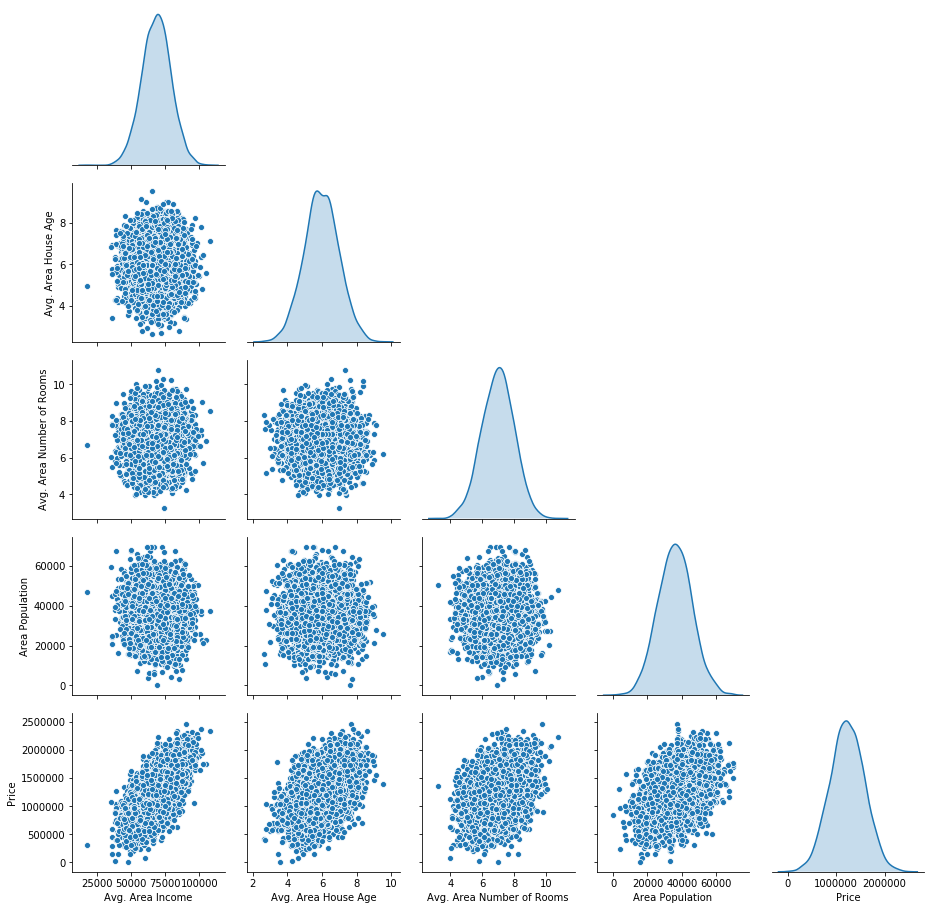

In [14]:
sns.pairplot(x2, corner=True, diag_kind="kde")

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=45)

In [77]:
rl = LinearRegression()
rl.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
print("Coeficientes \n")
rl.coef_

Coeficientes 



array([ 4.92386058e-15, -3.41086048e-11, -1.63900822e-11,  4.55228548e-13,
       -1.03736464e-14,  1.00000000e+00])

In [79]:
predicciones_rl = rl.predict(x_test)
predicciones_rl[0:20]

array([1275143.16840797,  926880.85055132, 1440909.00128311,
       1185734.9581773 ,  936864.68783437, 1621742.74826878,
       1230391.46829734,  724121.67338409, 1258178.80441188,
       1064509.52262081,  861321.58069247, 1174779.15776156,
       1471031.42057582,  628870.34564063, 1133910.64844312,
       1531447.28528137, 1267150.83668714,  850010.18155273,
        762144.92612381, 1088176.20051646])

In [80]:
print("Error cuadrático medio \n")
metrics.mean_squared_error(y_test, predicciones_rl)

Error cuadrático medio 



6.455576904203924e-20

In [81]:
print("RMSE \n")
np.sqrt(metrics.mean_squared_error(y_test, predicciones_rl))

RMSE 



2.5407827345532565e-10

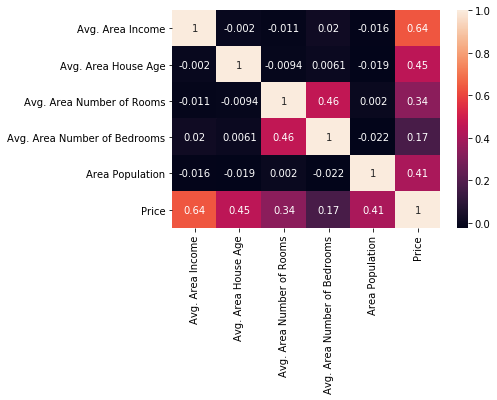

In [33]:
sns.heatmap(x.corr(), annot=True)

#  <center> <font color='darkcyan'> Regresión Logistica </font> </center>

In [86]:
base2 = pd.read_csv('breast_cancer_dataset.csv')
base2.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [87]:
print("Tipo de Variables \n")
print(base2.dtypes)
print("Cantidad de datos faltantes \n")
print(base2.isnull().sum())
print("Estadisticos de resumen \n")
print(base2.describe(include="all"))

Tipo de Variables 

clump_thickness                int64
uniformity_of_cell_size        int64
uniformity_of_cell_shape       int64
marginal_adhesion              int64
single_epithelial_cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitosis                        int64
class                          int64
dtype: object
Cantidad de datos faltantes 

clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitosis                        0
class                          0
dtype: int64
Estadisticos de resumen 

       clump_thickness  uniformity_of_cell_size  uniformity_of_cell_shape  \
count       569.000000               569.000000                569.000000   
mean          4.539543                 3.18

In [88]:
## convirtiendo la variable class en categorica
base2['class'] = base2['class'].astype('category')
x = base2.drop('class', axis=1)
y = base2['class']

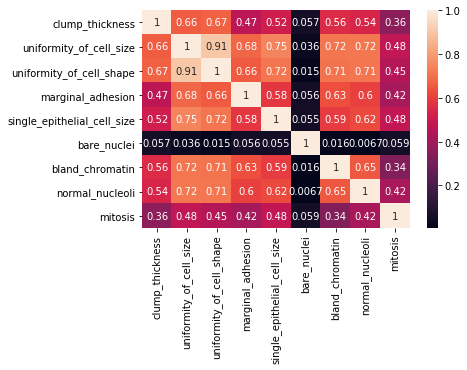

In [89]:
sns.heatmap(base2.corr(), annot=True)

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=45)
rlog = LogisticRegression()
rlog.fit(x_train, y_train)

C:\Users\JESSICA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
predicciones_log = rlog.predict(x_test)
predicciones_log[0:11]

array([2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4], dtype=int64)

In [92]:
print("Accuracy \n")
metrics.accuracy_score(y_test, predicciones_log)

Accuracy 



0.8654970760233918

In [93]:
print("ROC \n")
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicciones_log, pos_label=2)
metrics.auc(fpr, tpr)

ROC 



0.13712686567164178

In [94]:
print("Matriz de confusión \n")
metrics.confusion_matrix(y_test, predicciones_log)

Matriz de confusión 



array([[91, 13],
       [10, 57]], dtype=int64)

In [95]:
print("Reporte General del Ajuste \n")
print(metrics.classification_report(y_test, predicciones_log))

Reporte General del Ajuste 

              precision    recall  f1-score   support

           2       0.90      0.88      0.89       104
           4       0.81      0.85      0.83        67

    accuracy                           0.87       171
   macro avg       0.86      0.86      0.86       171
weighted avg       0.87      0.87      0.87       171



#  <center> <font color='darkcyan'> Árboles de decisión </font> </center>

In [96]:
base2 = pd.read_csv('breast_cancer_dataset.csv')
base2.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [97]:
base2['class'] = base2['class'].astype('category')

In [98]:
x = base2.drop('class', axis=1)
y = base2['class']

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=45)
ad = DecisionTreeClassifier()
ad.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [100]:
predi_ad = ad.predict(x_test)
predi_ad[0:11]

array([4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [103]:
print('Accuracy \n')
metrics.accuracy_score(y_test,predi_ad)

Accuracy 



0.9239766081871345

In [104]:
print('Matriz de confusión \n')
metrics.confusion_matrix(y_test, predi_ad)

Matriz de confusión 



array([[100,   4],
       [  9,  58]], dtype=int64)

In [105]:
print("Reporte General del Ajuste \n")
print(metrics.classification_report(y_test, predi_ad ))

Reporte General del Ajuste 

              precision    recall  f1-score   support

           2       0.92      0.96      0.94       104
           4       0.94      0.87      0.90        67

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



#  <center> <font color='darkcyan'> RandomForest </font> </center>

In [106]:
base2 = pd.read_csv('breast_cancer_dataset.csv')
base2.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [107]:
base2['class'] = base2['class'].astype('category')
x = base2.drop('class', axis=1)
y = base2['class']

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=45)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
pred_rf = rf.predict(x_test)

In [110]:
accuracy = []
for i in range(50,100):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(x_train, y_train)
    prediccion_i = rf.predict(x_test)
    accuracy.append(metrics.balanced_accuracy_score(y_test, prediccion_i))

In [111]:
accuracy

[0.9728042479908152,
 0.9728042479908152,
 0.965341561423651,
 0.9456084959816302,
 0.9578788748564868,
 0.965341561423651,
 0.9578788748564868,
 0.965341561423651,
 0.9728042479908152,
 0.9679965556831228,
 0.9504161882893226,
 0.9578788748564868,
 0.9728042479908152,
 0.9578788748564868,
 0.965341561423651,
 0.965341561423651,
 0.9504161882893226,
 0.9605338691159586,
 0.9578788748564868,
 0.9578788748564868,
 0.9578788748564868,
 0.9578788748564868,
 0.9578788748564868,
 0.9578788748564868,
 0.9578788748564868,
 0.9578788748564868,
 0.965341561423651,
 0.965341561423651,
 0.9728042479908152,
 0.9504161882893226,
 0.9728042479908152,
 0.965341561423651,
 0.9578788748564868,
 0.965341561423651,
 0.965341561423651,
 0.9728042479908152,
 0.9728042479908152,
 0.965341561423651,
 0.9504161882893226,
 0.9728042479908152,
 0.9456084959816302,
 0.9504161882893226,
 0.9504161882893226,
 0.9578788748564868,
 0.965341561423651,
 0.965341561423651,
 0.9504161882893226,
 0.9530711825487945,
 0.95

In [112]:
rf = RandomForestClassifier(n_estimators=73)
rf.fit(x_train, y_train)
prediccion_rf = rf.predict(x_test)

In [113]:
print('Matriz de confusión \n')
metrics.confusion_matrix(y_test, prediccion_rf)

Matriz de confusión 



array([[103,   1],
       [  5,  62]], dtype=int64)

In [114]:
print('Accuracy \n')
metrics.accuracy_score(y_test, prediccion_rf)

Accuracy 



0.9649122807017544

In [116]:
print("Reporte General del Ajuste \n")
print(metrics.classification_report(y_test, prediccion_rf))

Reporte General del Ajuste 

              precision    recall  f1-score   support

           2       0.95      0.99      0.97       104
           4       0.98      0.93      0.95        67

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



#  <center> <font color='darkcyan'> KNN </font> </center>

In [59]:
base2 = pd.read_csv('breast_cancer_dataset.csv')
base2.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [60]:
base2['class'] = base2['class'].astype('category')
x = base2.drop('class', axis=1)
y = base2['class']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=45)
kn =  KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
kn =  KNeighborsClassifier(n_neighbors=14)
kn.fit(x_train,y_train)
predi_kn = kn.predict(x_test)

In [62]:
print("accuracy \n")
metrics.accuracy_score(y_test, predi_kn)

accuracy 



0.9766081871345029

In [117]:
print("Reporte General del Ajuste \n")
print(metrics.classification_report(y_test, predi_kn))

Reporte General del Ajuste 

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       104
           4       0.98      0.96      0.97        67

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



#  <center> <font color='darkcyan'> Análisis Discriminante Lineal y Análisis Cuadratico Lineal  </font> </center>

In [63]:
base2 = pd.read_csv('breast_cancer_dataset.csv')
base2.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [64]:
base2['class'] = base2['class'].astype('category')
x = base2.drop('class', axis=1)
y = base2['class']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=45)

In [65]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
y_pred = lda.predict(x_test)
print("Matriz de confusión \n")
print(metrics.confusion_matrix(y_test, y_pred))
print("Accuracy \n")
print(metrics.accuracy_score(y_test, y_pred))

Matriz de confusión 

[[103   1]
 [  8  59]]
Accuracy 

0.9473684210526315


In [118]:
print("Reporte General del Ajuste LDA \n")
print(metrics.classification_report(y_test, y_pred))

Reporte General del Ajuste LDA 

              precision    recall  f1-score   support

           2       0.98      0.96      0.97       104
           4       0.94      0.97      0.96        67

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.96       171



In [66]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)
y_pred = qda.predict(x_test)
print("Matriz de confusión \n")
print(metrics.confusion_matrix(y_test, y_pred))
print("Accuracy \n")
print(metrics.accuracy_score(y_test, y_pred))

Matriz de confusión 

[[100   4]
 [  2  65]]
Accuracy 

0.9649122807017544


In [119]:
print("Reporte General del Ajuste QDA \n")
print(metrics.classification_report(y_test, y_pred))

Reporte General del Ajuste QDA 

              precision    recall  f1-score   support

           2       0.98      0.96      0.97       104
           4       0.94      0.97      0.96        67

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.96       171



#  <center> <font color='darkcyan'> Máquinas de Soporte Vectorial  </font> </center>

In [197]:
np.random.seed(20200327)
x1 = np.random.normal(1, 0.1, 100)
x2 = np.random.normal(1, 0.1, 100) 
x1[0:30] = x1[0:30] + 1
x1[31:60] = x1[31:60] - 1
x2[0:30] = x2[0:30] + 1
x2[31:60] = x2[31:60] - 1
y = [1 if i < 60 else 0 for i in range(0,100)]
df = pd.DataFrame({"x1": x1,"x2": x2,"y" : y})
X = df.iloc[:,[0,1]]
Y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=0)

In [198]:
SVM = svm.SVC(kernel='poly', degree = 2)
SVM.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [199]:
x_test = np.array(x_test)
y_test = np.array(y_test)

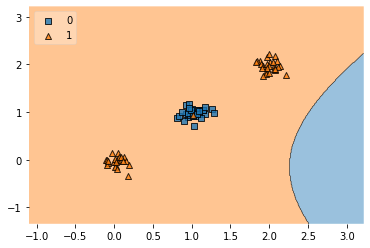

In [200]:
plot_decision_regions(x_test, y_test, clf=SVM, legend=2)

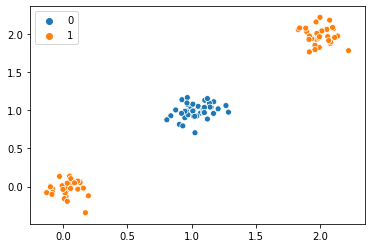

In [201]:
sns.scatterplot(x1, x2, hue = y)